<a href="https://colab.research.google.com/github/ankit7700/Project-4/blob/main/Netflix_Movies_%26_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Ankit Choudhary
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The objective of this project is to analyze and cluster a dataset related to Netflix. **The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters**.

To begin with, the dataset will be preprocessed by handling missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Feature engineering techniques may also be applied to extract useful information from the existing attributes.

Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. **Visualizations and statistical summaries will be used to understand the distribution of variables, identify any trends, and explore relationships between different features**.

Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes. **The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.**

After the clustering process, the results will be evaluated and interpreted. **The clusters will be analyzed to understand the common characteristics and patterns within each group. This analysis will provide valuable information for Netflix in terms of content categorization, recommendation systems, and content acquisition strategies**.

Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. **Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix** to enhance user experience and content offerings.

**In conclusion, this project aims to analyze a Netflix dataset, perform clustering techniques to group similar shows and movies together, and provide insights and recommendations based on the clustering results. The project will contribute to a better understanding of Netflix's content landscape and aid in decision-making processes for the company**.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

path = '/content/drive/MyDrive/Colab Notebooks/data science/module 6/project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

raw_df = pd.read_csv(path)

df = raw_df.copy()

### Dataset First View

In [4]:
# Dataset First Look

df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

print(f"No of Row's = {df.shape[0]}\nNo of Columns = {df.shape[1]}")


No of Row's = 7787
No of Columns = 12


### Dataset Information

In [7]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

null_value = df.isna().sum().sort_values(ascending=False)
null_value

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Total null values

print("Total missing value =",df.isna().sum().sum())

Total missing value = 3631


In [11]:
# Visualizing the missing values

fig = px.bar(x=null_value[null_value>0], y=null_value[null_value>0].index)
fig.update_layout(
    title = "Missing value count",
    xaxis_title = "No of missing value",
    yaxis_title = "column name",)
fig.show()

In [12]:
null_percentage = round((null_value/len(df))*100,2)
null_percentage

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [13]:
fig = px.bar(x=null_percentage[null_percentage>0], y=null_percentage[null_percentage>0].index)
fig.update_layout(
    title = "Missing value percent",
    xaxis_title = "% of missing value",
    yaxis_title = "column name",)
fig.show()

In [14]:
# Handling Null Values

df['director'].fillna(value='Unknown',inplace=True)
df['cast'].fillna(value='Unknown',inplace=True)
df['country'].fillna(value='Unknown',inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

df.dropna(axis=0, inplace = True)

In [15]:
# after removing null values df.shape

print(f"No of Row's = {df.shape[0]}\nNo of Columns = {df.shape[1]}")

No of Row's = 7777
No of Columns = 12


### What did you know about your dataset?

**Answer Here**

This dataset  contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title. It consists of 12 columns and 7787 rows & after handling null values it contain 7777 rows.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns

print(list(df.columns))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [17]:
# Dataset Describe

df.describe(include='all')

show_id   type title director     cast        country       date_added  \
count     7777   7777  7777     7777     7777           7777             7777   
unique    7777      2  7777     4050     6822            682             1565   
top         s1  Movie    3%  Unknown  Unknown  United States  January 1, 2020   
freq         1   5377     1     2379      718           2549              118   
mean       NaN    NaN   NaN      NaN      NaN            NaN              NaN   
std        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
min        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
25%        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
50%        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
75%        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
max        NaN    NaN   NaN      NaN      NaN            NaN              NaN   

        release_year rating  duration      listed_in  \
count    7777.000000   7777      7777           7777   
unique           NaN     14       216            491   
top              NaN  TV-MA  1 Season  Documentaries   
freq             NaN   2868      1608            334   
mean     2013.935965    NaN       NaN            NaN   
std         8.760694    NaN       NaN            NaN   
min      1925.000000    NaN       NaN            NaN   
25%      2013.000000    NaN       NaN            NaN   
50%      2017.000000    NaN       NaN            NaN   
75%      2018.000000    NaN       NaN            NaN   
max      2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7777  
unique                                               7759  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Variables Description

**Attribute Information**

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.

df.nunique()

show_id         7777
type               2
title           7777
director        4050
cast            6822
country          682
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

In [19]:
print(df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [Unknown, Jorge Michel Grau, Gilbert Chan, Sha...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.

In [21]:
# Top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [22]:
# Genre of shows

df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [23]:
# Choosing the primary country and primary genre to simplify the analysis

df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [24]:
# contry in which a movie was produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [25]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [26]:
# Splitting the duration column, and changing the datatype to integer

df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))


In [27]:
# Number of seasons for tv shows

df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [28]:
# Movie length in minutes

df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [29]:
df["date_added"] = pd.to_datetime(df['date_added'])            # Typecasting 'date_added' from string to datetime


df['month_added'] = df['date_added'].dt.month                  # Adding new attributes month and year of date added
df['year_added'] = df['date_added'].dt.year

df.date_added.min(),df.date_added.max()                      # first and last date on which a show was added on Netflix

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [30]:
df.drop('date_added', axis=1, inplace=True)

<Axes: xlabel='rating', ylabel='count'>

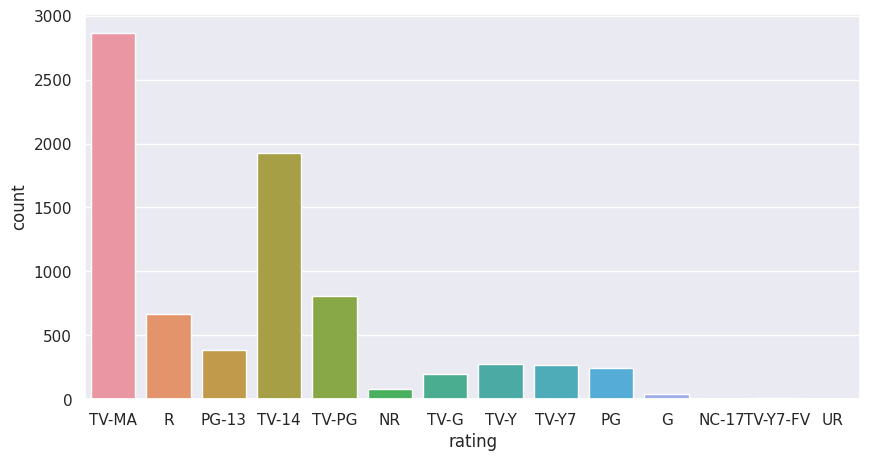

In [31]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

In [32]:
# Age ratings
print(list(df.rating.unique()))

['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']


In [33]:
# Changing the values in the rating column
ratings = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['target_ages'] = df['rating'].replace(ratings)
print(list(df.target_ages.unique()))

['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']


<Axes: xlabel='target_ages', ylabel='count'>

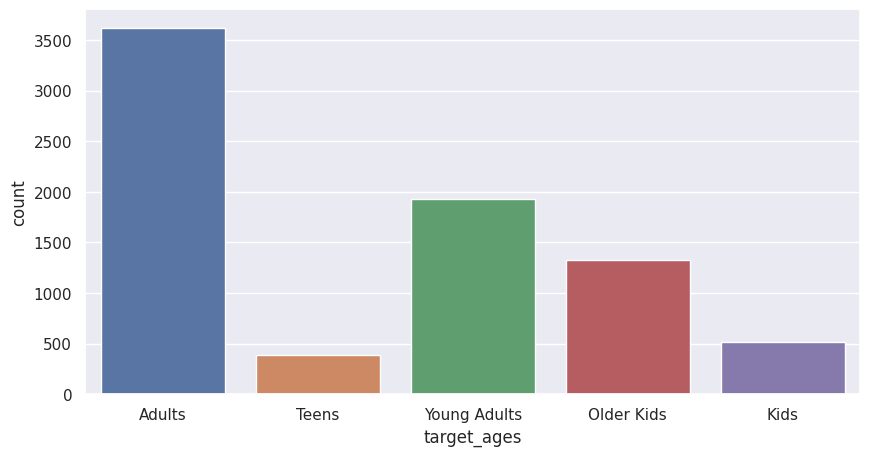

In [34]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='target_ages',data=df)

### What all manipulations have you done and insights you found?

Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [35]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating  duration               listed_in  \
0          2020  TV-MA         4  International TV Shows   
1          2016  TV-MA        93                  Dramas   
2          2011      R        78           Horror Movies   
3          2009  PG-13        80      Action & Adventure   
4          2008  PG-13       123                  Dramas   

                                         description  month_added  year_added  \
0  In a future where the elite inhabit an island ...            8        2020   
1  After a devastating earthquake hits Mexico Cit...           12        2016   
2  When an army recruit is found dead, his fellow...           12        2018   
3  In a postapocalyptic world, rag-doll robots hi...           11        2017   
4  A brilliant group of students become card-coun...            1        2020   

  target_ages  
0      Adults  
1      Adults  
2      Adults  
3       Teens  
4       Teens

In [36]:
df.nunique()

show_id         7777
type               2
title           7777
director        4050
cast            6822
country           82
release_year      73
rating            14
duration         206
listed_in         36
description     7759
month_added       12
year_added        14
target_ages        5
dtype: int64

### Univatiate Analysis

#### Chart - 1 - Number of Movies and TV Shows in the dataset

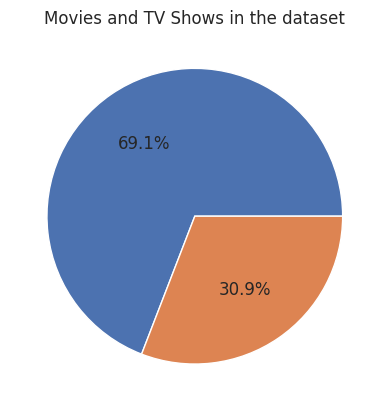

In [37]:
# Chart - 1 visualization code

plt.pie(df['type'].value_counts(), autopct='%1.1f%%')
plt.title('Movies and TV Shows in the dataset')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [38]:
plot_2 = df[df['director']!='Unknown'].director.value_counts().reset_index().head(10)
plot_2

index  director
0  Raúl Campos, Jan Suter        18
1            Marcus Raboy        16
2               Jay Karas        14
3     Cathy Garcia-Molina        13
4         Youssef Chahine        12
5         Martin Scorsese        12
6             Jay Chapman        12
7        Steven Spielberg        10
8            David Dhawan         9
9             Ryan Polito         8

In [39]:
# Chart - 2 visualization code

fig = px.bar(plot_2, x=plot_2['index'], y=plot_2.director, color=plot_2['director'], text_auto=True)
fig.update_layout(
    title = "Top 15 directors with highest number of Movies and Tv Shows",
    xaxis_title = "directors",
    yaxis_title = "Movies Directed"
    )
fig.show()

Text(0.5, 1.0, 'Top 10 movie directors')

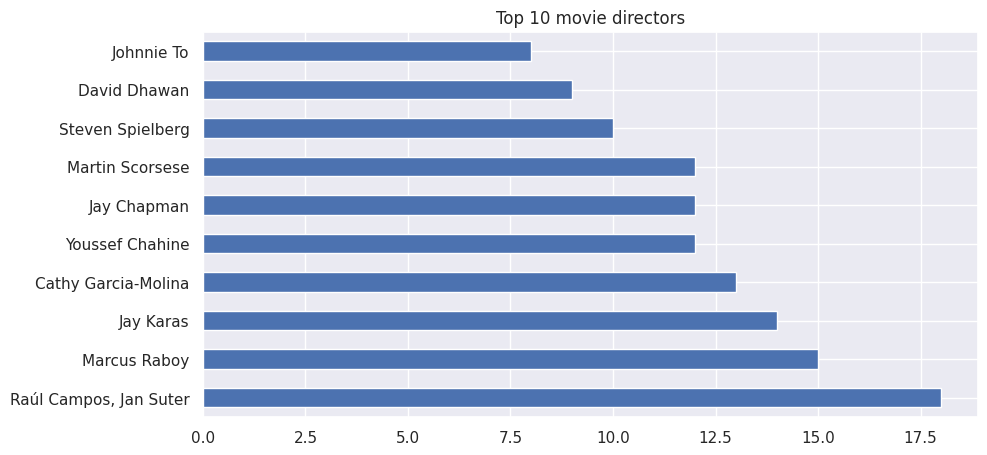

In [40]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Text(0.5, 1.0, 'Top 10 TV show directors')

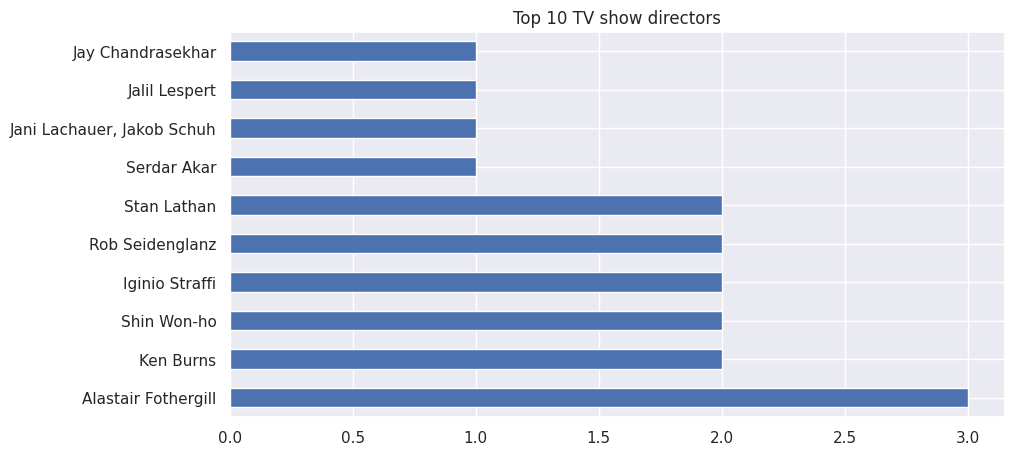

In [41]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [42]:

plot_3 = df[~(df['country']=='Unknown')].country.value_counts().head(10).reset_index()
plot_3

index  country
0   United States     2877
1           India      956
2  United Kingdom      576
3          Canada      259
4           Japan      236
5          France      196
6     South Korea      194
7           Spain      168
8          Mexico      123
9       Australia      107

In [43]:
# Chart - 3 visualization code

fig = px.bar(plot_3, x=plot_3['index'], y=plot_3.country, color=plot_3['country'], text_auto=True)
fig.update_layout(
    title = "Top 10 countries with the highest number of shows",
    xaxis_title = "countries",
    yaxis_title = "number of shows")
fig.show()

In [44]:
# % share of movies / tv shows by top 3 countries

df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [45]:
# % share of movies / tv shows by top 10 countries

df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 1.0, 'distribution by released year')

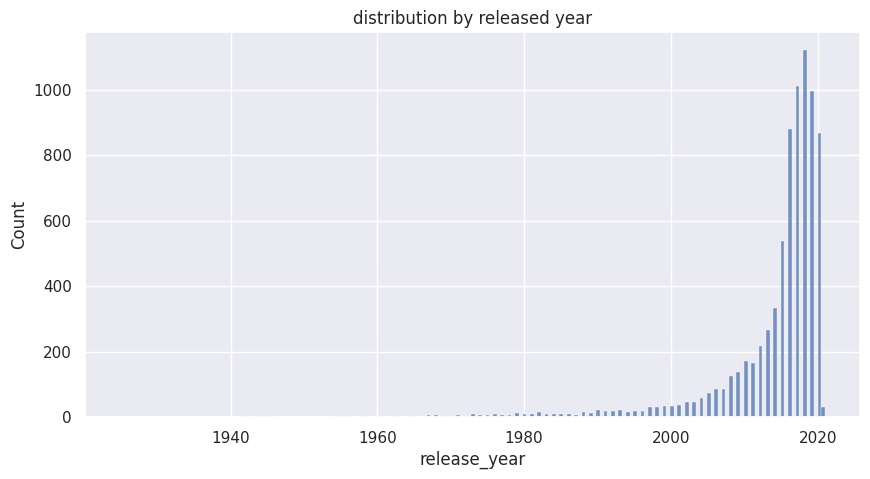

In [46]:
# Chart - 4 visualization code

# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [47]:

plot_5 = df['month_added'].value_counts().reset_index()
plot_5

index  month_added
0      12          833
1      10          785
2       1          757
3      11          738
4       3          669
5       9          619
6       8          618
7       4          601
8       7          600
9       5          543
10      6          542
11      2          472

In [48]:
# Chart - 5 visualization code

# Number of shows added on different months
fig = px.bar(plot_5, x=plot_5['index'], y=plot_5['month_added'], color=plot_5['month_added'], text_auto=True)
fig.update_layout(
    title = "Shows added each month over the years",
    xaxis_title = "month",
    yaxis_title = "no Shows added")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 1.0, 'Top 10 genres')

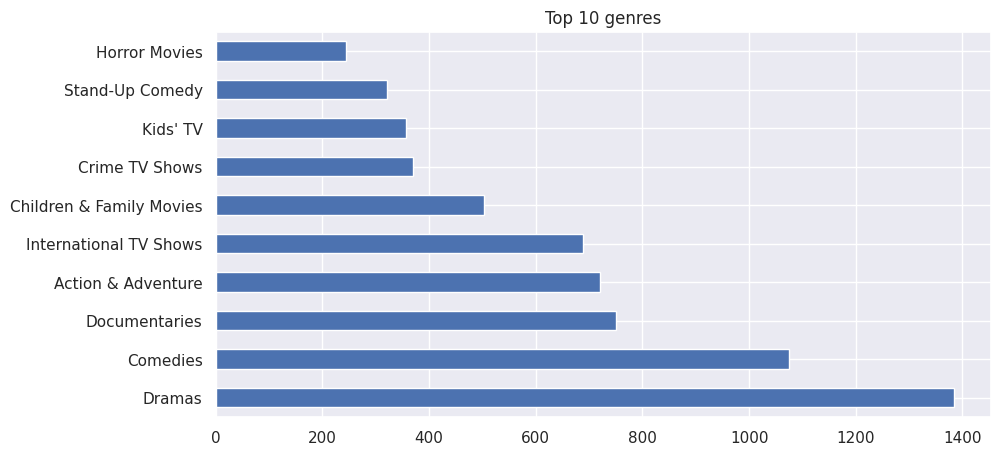

In [49]:
# Chart - 6 visualization code

# Top 10 genres
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [50]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [51]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

Text(0.5, 1.0, 'Top 10 genres for movies')

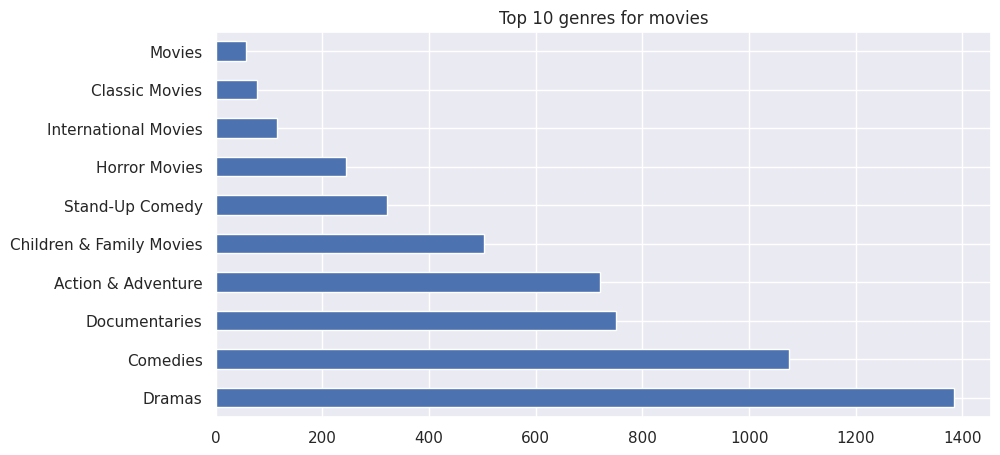

In [52]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

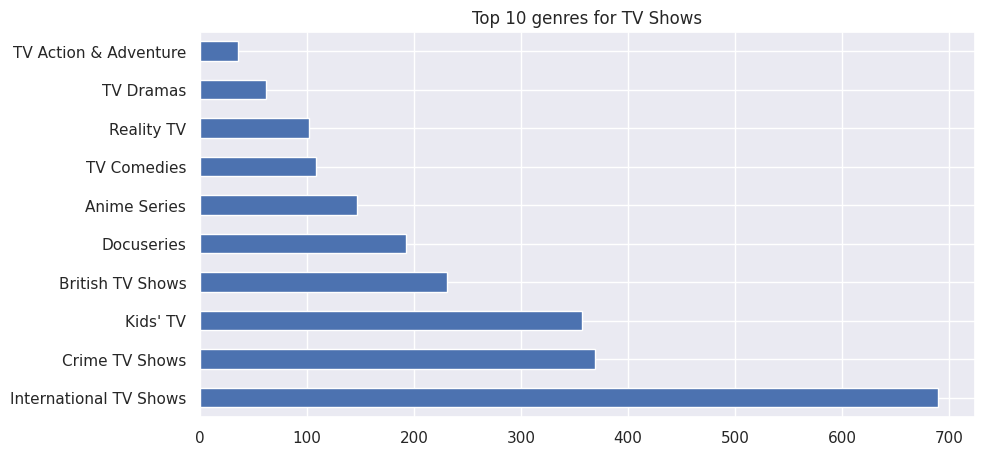

In [53]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [54]:
plot_7 = df['year_added'].value_counts().reset_index()
plot_7

index  year_added
0    2019        2153
1    2020        2009
2    2018        1685
3    2017        1225
4    2016         443
5    2021         117
6    2015          88
7    2014          25
8    2011          13
9    2013          11
10   2012           3
11   2008           2
12   2009           2
13   2010           1

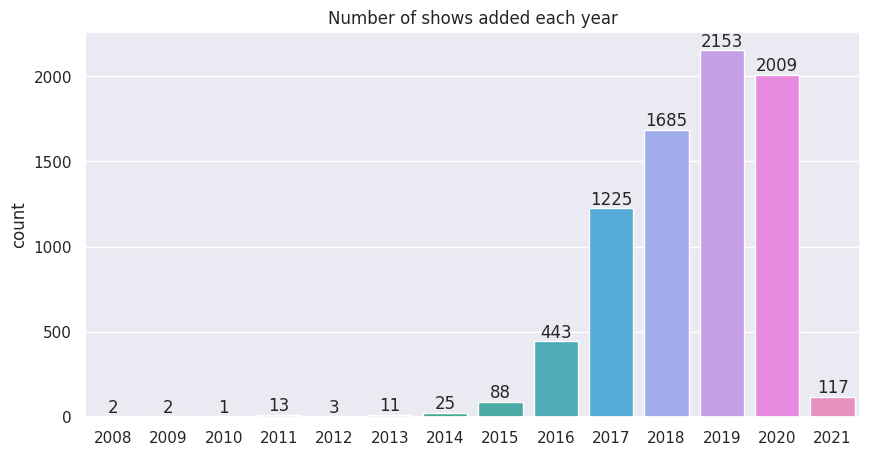

In [55]:
# Chart - 7 visualization code

# Number of shows added over the years
plt.figure(figsize = (10,5))
a = sns.countplot(x=df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')
for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

In [56]:
tv_show = df[df["type"] == "TV Show"]
yearly_tv_show_count = tv_show['year_added'].value_counts().sort_index()

movie = df[df["type"] == "Movie"]
yearly_movie_count = movie['year_added'].value_counts().sort_index()

In [57]:

fig_1 = go.Scatter(x=yearly_tv_show_count.index, y=yearly_tv_show_count.values, name="TV Shows")
fig_2 = go.Scatter(x=yearly_movie_count.index, y=yearly_movie_count.values, name="Movies")
fig = go.Figure(data=[fig_1, fig_2], layout=go.Layout(title="Content added over the years"))

fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [58]:
plot_8 = df['rating'].value_counts().reset_index()
plot_8

index  rating
0      TV-MA    2868
1      TV-14    1928
2      TV-PG     804
3          R     665
4      PG-13     386
5       TV-Y     279
6      TV-Y7     270
7         PG     247
8       TV-G     194
9         NR      83
10         G      39
11  TV-Y7-FV       6
12        UR       5
13     NC-17       3

In [59]:
# Chart - 8 visualization code

fig = px.bar(plot_8, x=plot_8['index'], y=plot_8['rating'], color=plot_8['rating'])
fig.update_layout(
    width=900, height=700,
    title = 'No of shows based on ratings',
    xaxis_title = 'rating',
    yaxis_title = 'No of shows'
)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## Bivariate analysis

#### Chart - 9

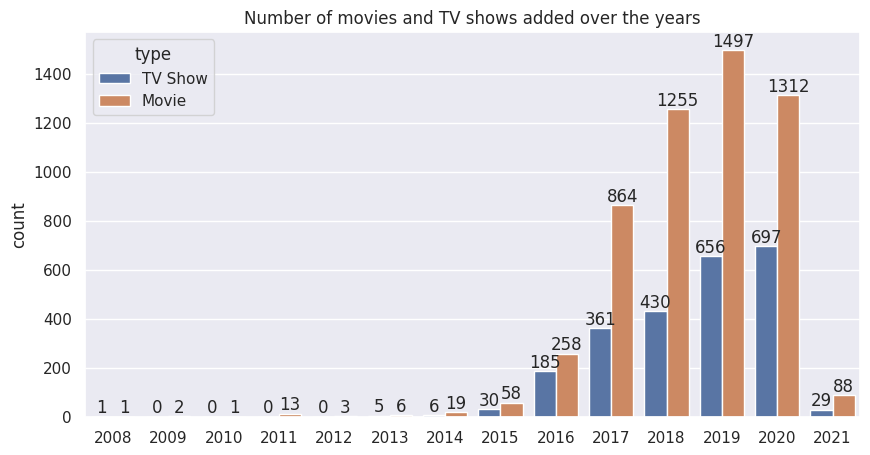

In [60]:
# Chart - 9 visualization code

# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
a = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

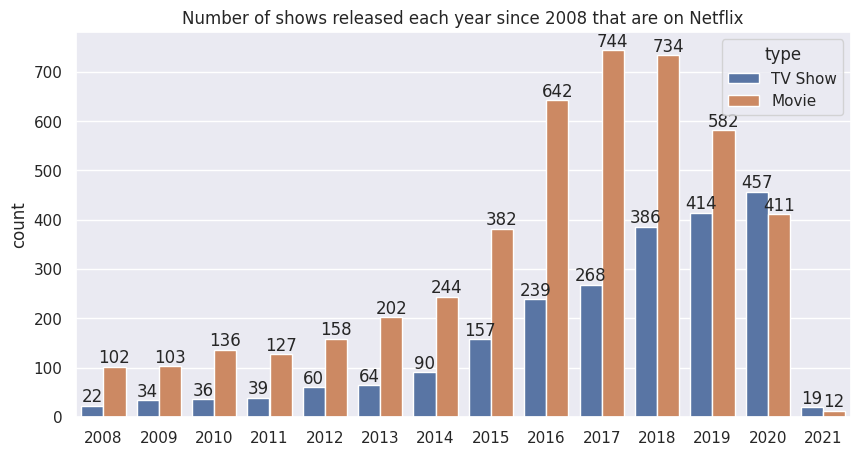

In [61]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
a = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

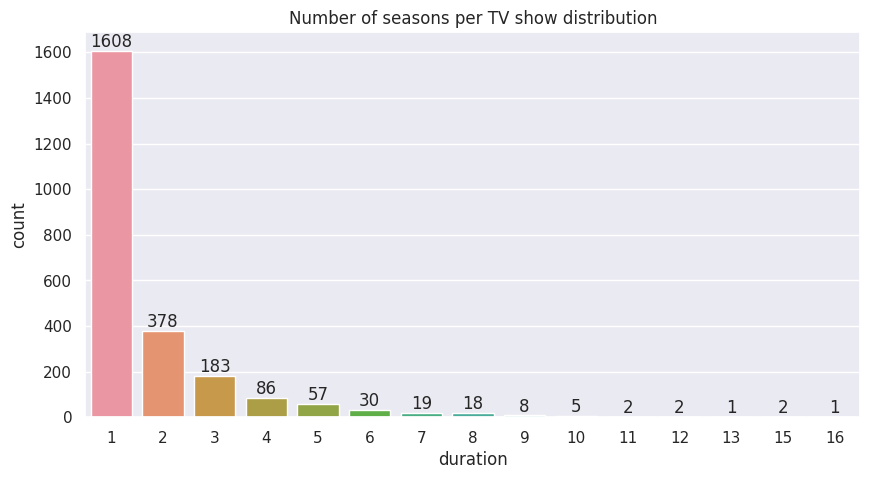

In [62]:
# Chart - 10 visualization code

# Seasons in each TV show
plt.figure(figsize=(10,5))
a = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')
for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

In [63]:
# % of tv shows with just 1 season

len(df[(df['type']=='TV Show') & (df['duration']==1)])/len(df[df['type']=='TV Show'])*100

67.0

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Text(0.5, 1.0, 'Movie duration distribution')

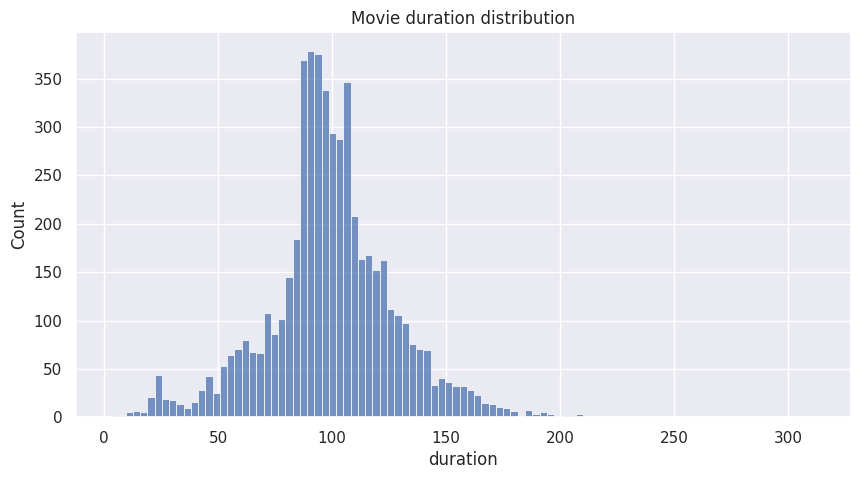

In [64]:
# Chart - 11 visualization code

# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [65]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

Text(0.5, 0, 'Year')

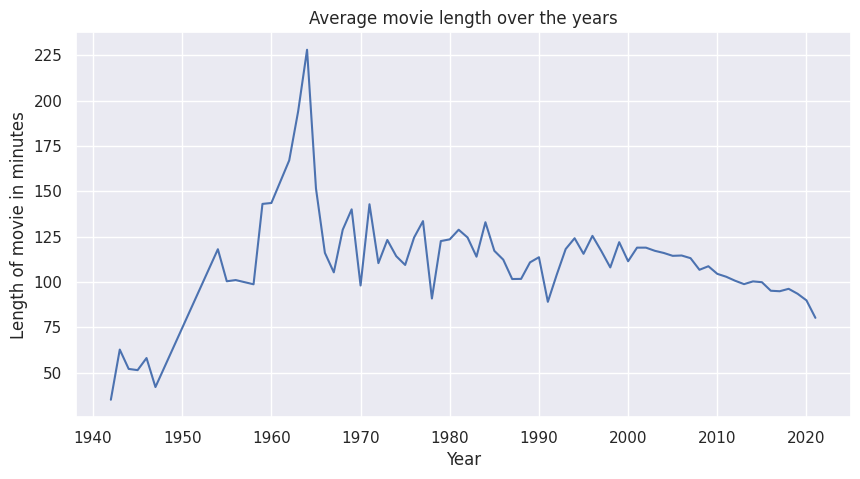

In [66]:
# Chart - 12 visualization code

# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

In [67]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

Text(0.5, 1.0, 'Top 10 genres for movies')

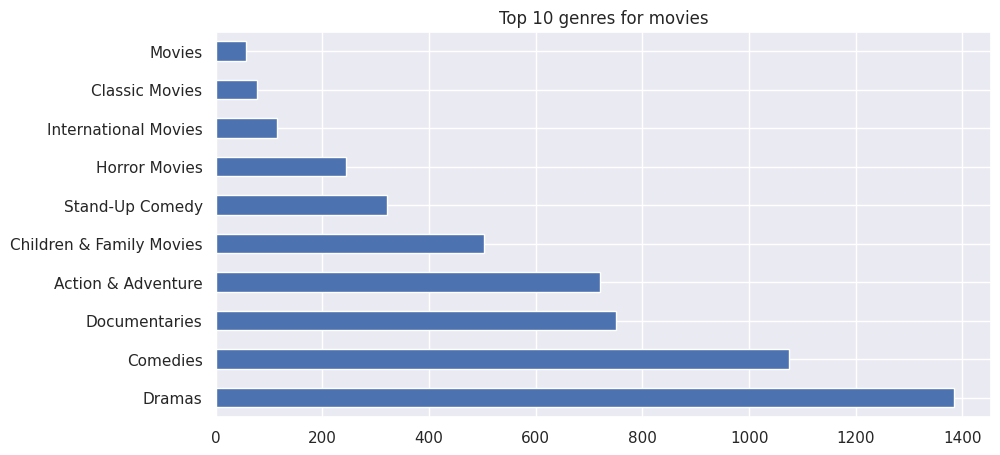

In [68]:
# Chart - 13 visualization code

# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

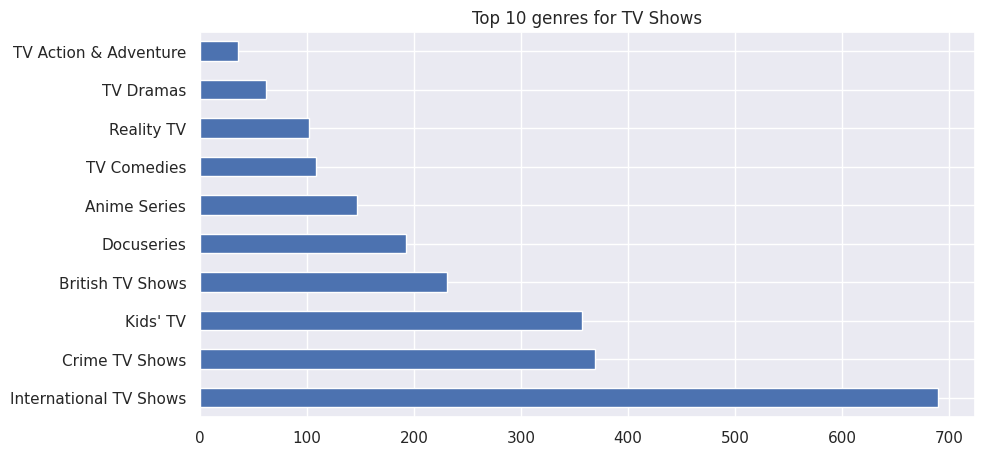

In [69]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [70]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country         Canada    France     India     Japan    Mexico  South Korea  \
target_ages                                                                   
Adults        0.467181  0.627551  0.259414  0.368644  0.764228     0.463918   
Kids          0.150579  0.086735  0.015690  0.008475  0.016260     0.046392   
Older Kids    0.220077  0.112245  0.163180  0.275424  0.089431     0.123711   
Teens         0.027027  0.030612  0.004184  0.012712  0.016260     0.000000   
Young Adults  0.135135  0.142857  0.557531  0.334746  0.113821     0.365979   

country          Spain  United Kingdom  United States   Unknown  
target_ages                                                      
Adults        0.797619        0.526042       0.489051  0.320158  
Kids          0.035714        0.078125       0.074731  0.169960  
Older Kids    0.053571        0.184028       0.196038  0.235178  
Teens         0.017857        0.071181       0.098366  0.005929  
Young Adults  0.095238        0.140625       0.141814  0.268775

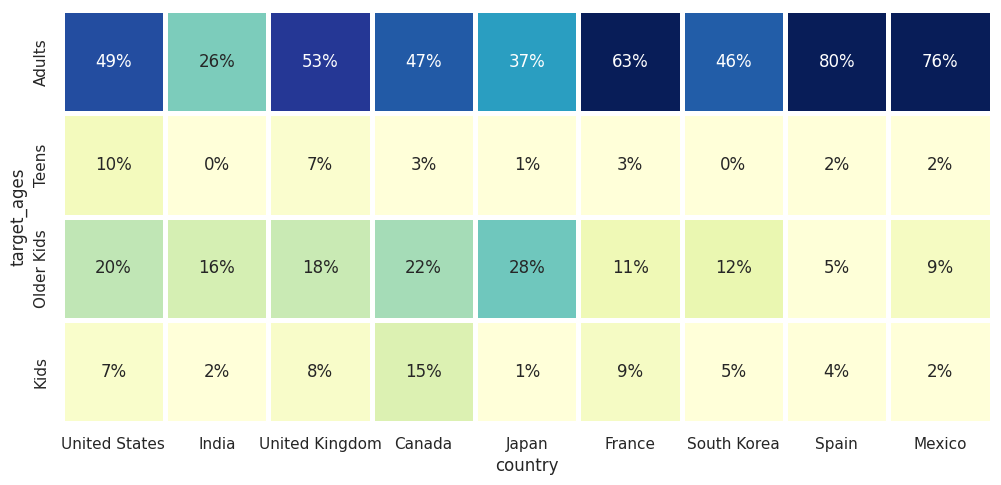

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

In [72]:
df['count'] = 1
data1 = df.groupby('listed_in')[['listed_in', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data1 = data1['listed_in']

data1

0                      Dramas
1                    Comedies
2               Documentaries
3          Action & Adventure
4      International TV Shows
5    Children & Family Movies
6              Crime TV Shows
7                    Kids' TV
8             Stand-Up Comedy
9               Horror Movies
Name: listed_in, dtype: object

In [73]:
df_heatmap1 = df[df['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in     Action & Adventure  Children & Family Movies  Comedies  \
target_ages                                                            
Adults                  0.503467                  0.000000  0.456238   
Kids                    0.001387                  0.350598  0.004655   
Older Kids              0.072122                  0.613546  0.109870   
Teens                   0.163662                  0.003984  0.097765   
Young Adults            0.259362                  0.031873  0.331471   

listed_in     Crime TV Shows  Documentaries    Dramas  Horror Movies  \
target_ages                                                            
Adults              0.750678       0.432756  0.559249       0.750000   
Kids                0.000000       0.057257  0.007948       0.000000   
Older Kids          0.013550       0.219707  0.097543       0.008197   
Teens               0.000000       0.034621  0.065029       0.110656   
Young Adults        0.235772       0.255659  0.270231       0.131148   

listed_in     International TV Shows  Kids' TV  Stand-Up Comedy  
target_ages                                                      
Adults                      0.464441  0.002801         0.894081  
Kids                        0.010160  0.495798         0.000000  
Older Kids                  0.108853  0.501401         0.018692  
Teens                       0.000000  0.000000         0.000000  
Young Adults                0.416546  0.000000         0.087227

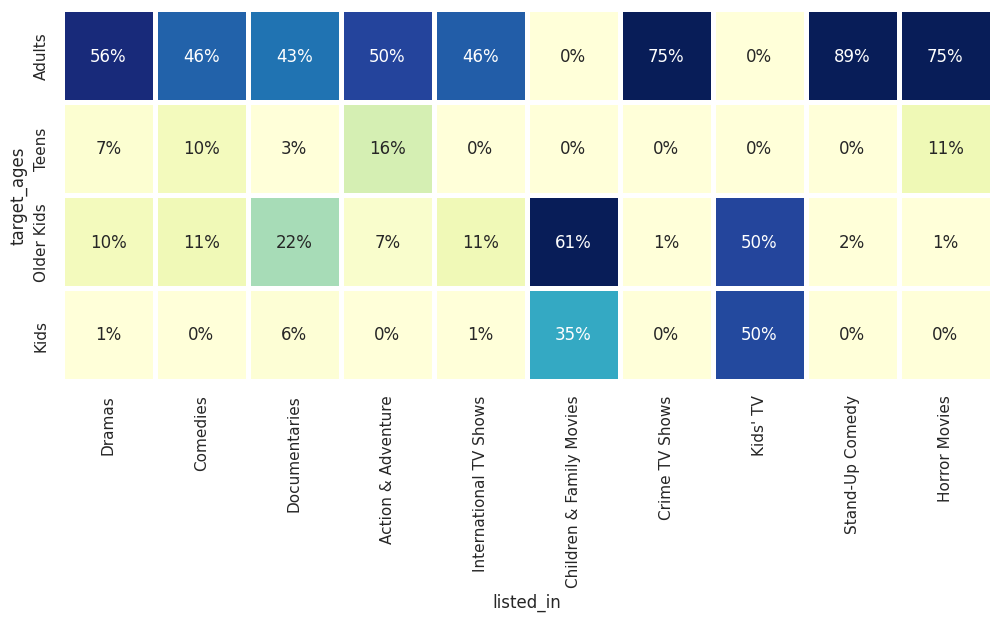

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Dramas', 'Comedies', 'Documentaries',
       'Action & Adventure',
       'International TV Shows', "Children & Family Movies",
       'Crime TV Shows', "Kids' TV",
       'Stand-Up Comedy',
       'Horror Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

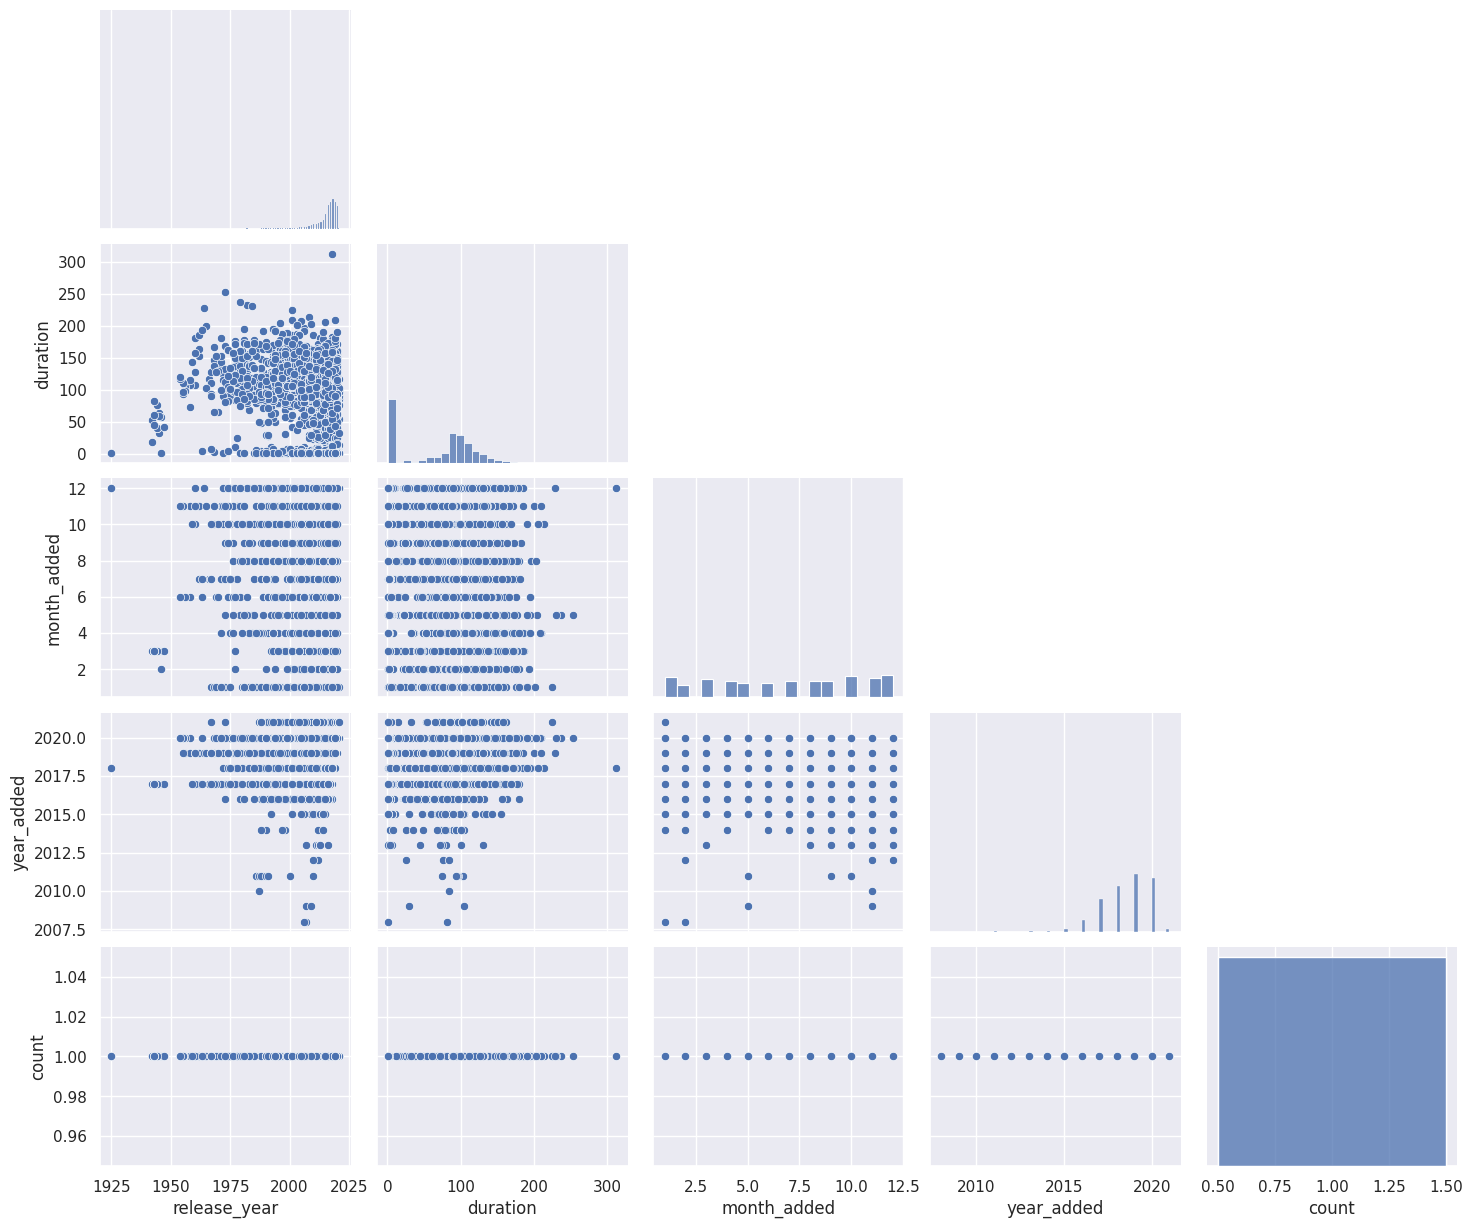

In [75]:
# Pair Plot visualization code

sns.pairplot(df, corner = True,aspect = 1.2)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

In [76]:
us_movie = df[(df['type']=='Movie') & (df.country == 'United States')]
india_movie = df[(df['type']=='Movie') & (df.country == 'India')]

In [77]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for both us_movie and india_movie
shapiro_us_movie = shapiro(us_movie['year_added'])
shapiro_india_movie = shapiro(india_movie['year_added'])

print("Shapiro-Wilk test for us_movie:", shapiro_us_movie)
print("Shapiro-Wilk test for india_movie:", shapiro_india_movie)

Shapiro-Wilk test for us_movie: ShapiroResult(statistic=0.8701395988464355, pvalue=1.1913357497017867e-38)
Shapiro-Wilk test for india_movie: ShapiroResult(statistic=0.9069856405258179, pvalue=8.965549969332084e-23)


**in shapiro test pvalue is greater then 0.05 so data is normally distributed so we can apply Independent 2 sample t-test**

In [78]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(us_movie['release_year'], india_movie['release_year'])
print(levene_test)

LeveneResult(statistic=0.8938562545481896, pvalue=0.34451105868140797)


**p-value is 0.344, which is greater than 0.05. Therefore, we can conclude that there is no significant difference in the variances of the release years between the US and India movies.**

In [79]:
# Define the null hypothesis
H0 = "Average number of movies on Netflix in United States <= average number of movies on Netflix in India."

# Define the alternative hypothesis
H1 = "Average number of movies on Netflix in United States > average number of movies on Netflix in India."

#### 2. Perform an appropriate statistical test.

In [80]:
# Perform Statistical Test to obtain P-Value

# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie['release_year'], india_movie['release_year'], equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: 2.336785044097827
p-value: 0.019560821910762183


In [81]:
# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")


Since p-value (0.019560821910762183) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

In [82]:
# Count the number of movies and TV shows in the DataFrame
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

In [83]:

# Define the null hypothesis
H0 = "The number of movies available on Netflix = the number of TV shows available on Netflix"

# Define the alternative hypothesis
H1 = "The number of movies available on Netflix != the number of TV shows available on Netflix"

#### 2. Perform an appropriate statistical test.

In [84]:
# Perform Statistical Test to obtain P-Value

from statsmodels.stats.proportion import proportions_ztest

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(df), len(df)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)

Z-statistic: 47.74059011958195
P-value: 0.0


In [85]:
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")


Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

In [86]:
movie_duration = df[df['type']== 'Movie'].duration

print('mean:',movie_duration.mean())
print('standard daviation:',movie_duration.std())
print('variance:',movie_duration.var())


mean: 99.30797842663195
standard daviation: 28.53088078610757
variance: 814.0111584310821


In [87]:
sample_movie_duration = movie_duration.sample(45)


print('mean:',sample_movie_duration.mean())
print('standard daviation:',sample_movie_duration.std())
print('variance:',sample_movie_duration.var())

mean: 96.53333333333333
standard daviation: 28.828332023770077
variance: 831.0727272727273


In [88]:
# Perform the Shapiro-Wilk test for sample_movie_duration
shapiro_sample_movie_duration = shapiro(sample_movie_duration)
print("Shapiro-Wilk test for desktop users:", shapiro_sample_movie_duration)

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9809396266937256, pvalue=0.6578940153121948)


**in shapiro test pvalue is greater then 0.05 so data is normally distributed so we can apply Single Sample t-test**

In [89]:
# Define the null hypothesis
H0 = ("The average duration of Movie is 99.30")

# Define the alternative hypothesis
H1 = "The average duration of Movie is not 99.30"

#### 2. Perform an appropriate statistical test.

In [90]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
# Calculate the test statistic
t_stat, p_value = stats.ttest_1samp(sample_movie_duration, 99.30)

# Print the results
print("Test statistic:", t_stat)
print("p-value:", p_value)

Test statistic: -0.6437890405156056
p-value: 0.5230539870190303


In [91]:
# Conclusion
if p_value < 0.05:
    print(f"Reject the null hypothesis.{H1}")
else:
    print(f"Fail to reject the null hypothesis.{H0}")

Fail to reject the null hypothesis.The average duration of Movie is 99.30


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [92]:

df1 = df.copy()

In [93]:
# Handling Missing Values & Missing Value Imputation

df1.isna().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

Its already handled in data wrangling, so now there are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [94]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

(Most of the columns are categorical, so no outliers observed)

### 3. Categorical Encoding

(No need as the data is categorical)

In [95]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [96]:
# Expand Contraction

df1['clustering'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['description'])

In [97]:
df1['clustering'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

In [98]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [99]:
# remove non-ascii characters

df1['clustering'] = remove_non_ascii(df1['clustering'])
df1['clustering'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

#### 2. Lower Casing

In [100]:
# Lower Casing

# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
df1['clustering'] = df1['clustering'].apply(to_lower)

# Cross checking our result for the function created
df1['clustering'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies the slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

#### 3. Removing Punctuations

In [101]:
# Remove Punctuations

# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [102]:
# Removing punctuation marks
df1['clustering'] = df1['clustering'].apply(remove_punctuation)

df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies the slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall'

#### 4. Removing URLs & Removing words and digits contain digits.

In [103]:
# Remove URLs & Remove words and digits contain digits

# 'tags' column does not have any URLs so remove words and digits containing digits
df1['clustering'] = df1['clustering'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies the slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall'

#### 5. Removing Stopwords & Removing White spaces

In [104]:
# Remove Stopwords

import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [105]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)



In [106]:
# Removing stop words
df1['clustering'] = df1['clustering'].apply(stopwords)

df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

In [107]:
# Remove White spaces
df1['clustering'] = df1['clustering'].str.strip()

# Cross-check our result for the function created
df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

#### 6. Rephrase Text

In [108]:
# Rephrase Text

def rephrase_tags(x):
  return x.replace('mall', 'shoping center')
df1['clustering'] = df1['clustering'].apply(rephrase_tags)

In [109]:
df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new shoping center'

In [110]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [111]:
# Lemmatization
df1['clustering'] = lemmatize_verbs(df1['clustering'])

df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new shoping center'

#### 7. Tokenization

In [112]:
# Tokenization

# Apply the tokenization to the 'tags' column of the DataFrame
df1['clustering'] = df1['clustering'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(df1['clustering'][40])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = df1['clustering']

['muharrem', 'gulmez', 'erdem', 'yener', 'ayhan', 'tas', 'emin', 'olcay', 'muharrem', 'gulmez', 'elif', 'nur', 'kerkuk', 'tark', 'papuccuoglu', 'suzan', 'aksoy', 'doga', 'konakoglu', 'esin', 'eden', 'deniz', 'ozerman', 'turkey', 'comedies', 'slacker', 'owner', 'public', 'bath', 'house', 'rallies', 'community', 'save', 'big', 'developer', 'comes', 'town', 'close', 'open', 'new', 'shoping', 'center']


In [113]:
print(temp_tags[40])

['muharrem', 'gulmez', 'erdem', 'yener', 'ayhan', 'tas', 'emin', 'olcay', 'muharrem', 'gulmez', 'elif', 'nur', 'kerkuk', 'tark', 'papuccuoglu', 'suzan', 'aksoy', 'doga', 'konakoglu', 'esin', 'eden', 'deniz', 'ozerman', 'turkey', 'comedies', 'slacker', 'owner', 'public', 'bath', 'house', 'rallies', 'community', 'save', 'big', 'developer', 'comes', 'town', 'close', 'open', 'new', 'shoping', 'center']


#### 8. Text Normalization

In [114]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.snowball import SnowballStemmer

# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
df1['clustering'] = df1['clustering'].apply(stemming)

# Cross-check our result for the function created
df1['clustering'][0]

'unknown joao miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zeze motta celso frateschi brazil intern tv show futur elit inhabit island paradis far crowd slum get one chanc join save squalor'

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [115]:
# POS Taging

# Loading Libraries
# import nltk
nltk.download('averaged_perceptron_tagger')

# Apply the pos tagging to the 'tags' column of the DataFrame
df1['clustering'] = temp_tags.apply(nltk.pos_tag)

# Cross-check our result for the function created
df1['clustering'][40]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('muharrem', 'NN'),
 ('gulmez', 'NN'),
 ('erdem', 'NN'),
 ('yener', 'NN'),
 ('ayhan', 'IN'),
 ('tas', 'NNS'),
 ('emin', 'VBP'),
 ('olcay', 'JJ'),
 ('muharrem', 'NN'),
 ('gulmez', 'NN'),
 ('elif', 'NN'),
 ('nur', 'JJ'),
 ('kerkuk', 'NN'),
 ('tark', 'NN'),
 ('papuccuoglu', 'NN'),
 ('suzan', 'NN'),
 ('aksoy', 'NN'),
 ('doga', 'NN'),
 ('konakoglu', 'NN'),
 ('esin', 'NN'),
 ('eden', 'JJ'),
 ('deniz', 'NN'),
 ('ozerman', 'NN'),
 ('turkey', 'NN'),
 ('comedies', 'NNS'),
 ('slacker', 'VBP'),
 ('owner', 'NN'),
 ('public', 'JJ'),
 ('bath', 'NN'),
 ('house', 'NN'),
 ('rallies', 'VBZ'),
 ('community', 'NN'),
 ('save', 'VBP'),
 ('big', 'JJ'),
 ('developer', 'NN'),
 ('comes', 'VBZ'),
 ('town', 'NN'),
 ('close', 'JJ'),
 ('open', 'JJ'),
 ('new', 'JJ'),
 ('shoping', 'VBG'),
 ('center', 'NN')]

In [116]:
# Using this tagset we know that which tag shows which type of POS
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [117]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
true_word = df1['clustering'].apply(sentence)

# Cross-check our result for the function created
print(true_word[40])

muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new shoping center 


In [118]:
true_word.shape

(7777,)

#### 10. Text Vectorization

In [119]:
# Vectorizing Text

# clustering tokens saved in a variable
clustering_data = df1['clustering']

In [120]:
# Tokenization
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(max_features = 20000)


In [121]:

X = tfidf.fit_transform(true_word).toarray()

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
print(tfidf.get_feature_names_out())

['aakash' 'aamir' 'aanand' ... 'zwart' 'zygmunt' 'zylka']


In [123]:
print(X.shape)

(7777, 20000)


In [124]:
vec_data=pd.DataFrame(X)
vec_data

0      1      2         3      4      5      6      7      8      9      \
0       0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0  0.132909    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...       ...    ...    ...    ...    ...    ...    ...   
7772    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
7773    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
7774    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
7775    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
7776    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  19990  19991  19992     19993  19994  19995  19996  19997  19998  \
0     ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...       ...    ...    ...    ...    ...    ...   
7772  ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
7773  ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
7774  ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
7775  ...    0.0    0.0    0.0  0.487742    0.0    0.0    0.0    0.0    0.0   
7776  ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   

      19999  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
7772    0.0  
7773    0.0  
7774    0.0  
7775    0.0  
7776    0.0  

[7777 rows x 20000 columns]

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [125]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [126]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [127]:
# Transform Your data

### 6. Data Scaling

In [128]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [129]:
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA()
pca.fit(X)

PCA()

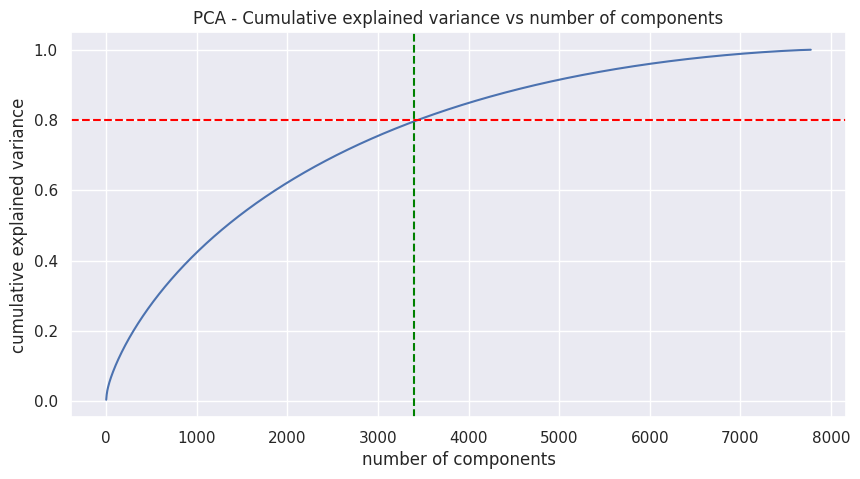

In [130]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3400, color='green', linestyle='--')

# Display chart
plt.show()

In [131]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=3400,random_state=42)
pca.fit(X)

PCA(n_components=3400, random_state=42)

In [132]:
# transformed features
x_pca = pca.transform(X)

In [133]:
# shape of transformed vectors
x_pca.shape

(7777, 3400)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [134]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [135]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Finding optimal number of clusters using the elbow method

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_pca)

visualizer.show()

In [149]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(x_pca)

# Predict on the model
y_kmean=kmean.predict(x_pca)

In [150]:
# Adding a new column 'K_mean_cluster' in the dataset
df["K_mean_cluster"]=y_kmean
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating  duration               listed_in  \
0          2020  TV-MA         4  International TV Shows   
1          2016  TV-MA        93                  Dramas   
2          2011      R        78           Horror Movies   
3          2009  PG-13        80      Action & Adventure   
4          2008  PG-13       123                  Dramas   

                                         description  month_added  year_added  \
0  In a future where the elite inhabit an island ...            8        2020   
1  After a devastating earthquake hits Mexico Cit...           12        2016   
2  When an army recruit is found dead, his fellow...           12        2018   
3  In a postapocalyptic world, rag-doll robots hi...           11        2017   
4  A brilliant group of students become card-coun...            1        2020   

  target_ages  count  K_mean_cluster  
0      Adults      1               4  
1      Adults      1               1  
2      Adults      1               2  
3       Teens      1               2  
4       Teens      1               2

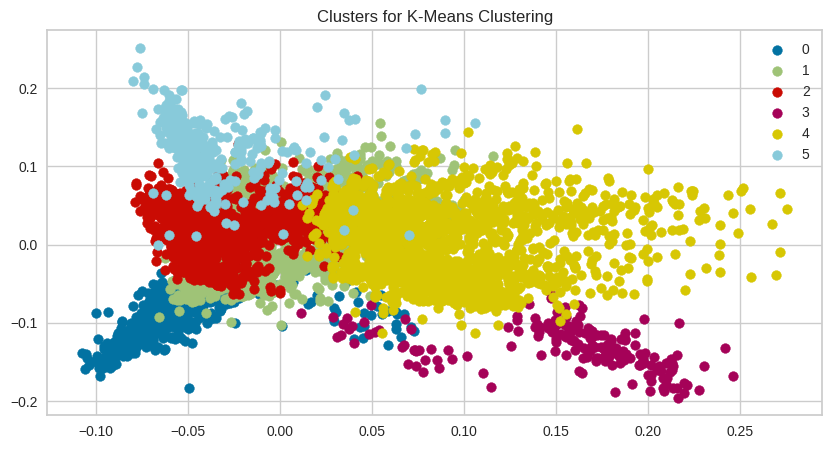

In [151]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(x_pca[y_kmean == i , 0] ,x_pca[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

In [ ]:
# # Elbow method to find the optimal value of k
# wcss=[]
# for i in range(1,31):
#   kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
#   kmeans.fit(x_pca)
#   wcss_iter = kmeans.inertia_
#   wcss.append(wcss_iter)

# number_clusters = range(1,31)
# plt.figure(figsize=(10,5))
# plt.plot(number_clusters,wcss)
# plt.title('The Elbow Method - KMeans clustering')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')

In [145]:
# # Plotting Silhouette score for different umber of clusters
# range_n_clusters = range(2,31)
# silhouette_avg = []
# for num_clusters in range_n_clusters:
#   # initialize kmeans
#   kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
#   kmeans.fit(x_pca)
#   cluster_labels = kmeans.labels_

#   # silhouette score
#   silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

# plt.figure(figsize=(10,5))
# plt.plot(range_n_clusters,silhouette_avg)
# plt.xlabel('Values of K')
# plt.ylabel('Silhouette score')
# plt.title('Silhouette analysis For Optimal k - KMeans clustering')
# plt.show()

In [ ]:
# # Clustering the data into 19 clusters
# kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
# kmeans.fit(x_pca)

In [152]:
# # Evaluation metrics - distortion, Silhouette score
# kmeans_distortion = kmeans.inertia_
# kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

# print((kmeans_distortion,kmeans_silhouette_score))

In [153]:
# # Adding a kmeans cluster number attribute
# df1['kmeans_cluster'] = kmeans.labels_

In [154]:
# # Number of movies and tv shows in each cluster
# plt.figure(figsize=(10,5))
# q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
# plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
# for i in q.patches:
#   q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [155]:
# # Building a wordcloud for the movie descriptions
# def kmeans_worldcloud(cluster_num):
#   comment_words = ''
#   stopwords = set(STOPWORDS)

#   # iterate through the csv file
#   for val in df1[df1['kmeans_cluster']==cluster_num].description.values:

#       # typecaste each val to string
#       val = str(val)

#       # split the value
#       tokens = val.split()

#       # Converts each token into lowercase
#       for i in range(len(tokens)):
#           tokens[i] = tokens[i].lower()

#       comment_words += " ".join(tokens)+" "

#   wordcloud = WordCloud(width = 700, height = 700,
#                   background_color ='white',
#                   stopwords = stopwords,
#                   min_font_size = 10).generate(comment_words)


#   # plot the WordCloud image
#   plt.figure(figsize = (10,5), facecolor = None)
#   plt.imshow(wordcloud)
#   plt.axis("off")
#   plt.tight_layout(pad = 0)

In [156]:
# # Wordcloud for cluster 0
# kmeans_worldcloud(0)

In [157]:
# # Wordcloud for cluster 1
# kmeans_worldcloud(1)

In [158]:
# # Wordcloud for cluster 2
# kmeans_worldcloud(2)

In [159]:
# # Wordcloud for cluster 3
# kmeans_worldcloud(3)

In [160]:
# # Wordcloud for cluster 4
# kmeans_worldcloud(4)

In [161]:
# # Wordcloud for cluster 5
# kmeans_worldcloud(5)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [162]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [163]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

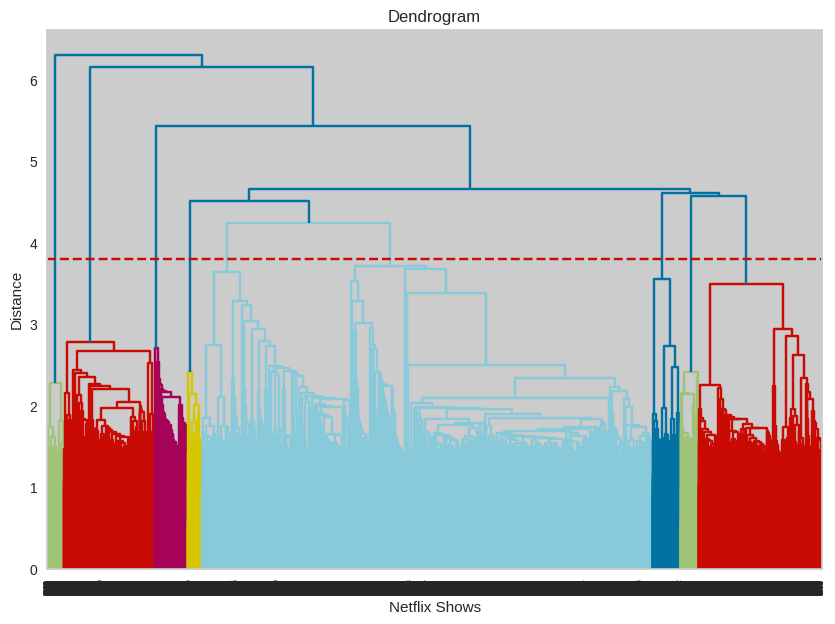

In [164]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [165]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([ 2, 11,  0, ...,  2,  3,  3])

In [166]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating  duration               listed_in  \
0          2020  TV-MA         4  International TV Shows   
1          2016  TV-MA        93                  Dramas   
2          2011      R        78           Horror Movies   
3          2009  PG-13        80      Action & Adventure   
4          2008  PG-13       123                  Dramas   

                                         description  month_added  year_added  \
0  In a future where the elite inhabit an island ...            8        2020   
1  After a devastating earthquake hits Mexico Cit...           12        2016   
2  When an army recruit is found dead, his fellow...           12        2018   
3  In a postapocalyptic world, rag-doll robots hi...           11        2017   
4  A brilliant group of students become card-coun...            1        2020   

  target_ages  count  K_mean_cluster  hierarchical_cluster  
0      Adults      1               4                     2  
1      Adults      1               1                    11  
2      Adults      1               2                     0  
3       Teens      1               2                     4  
4       Teens      1               2                     4

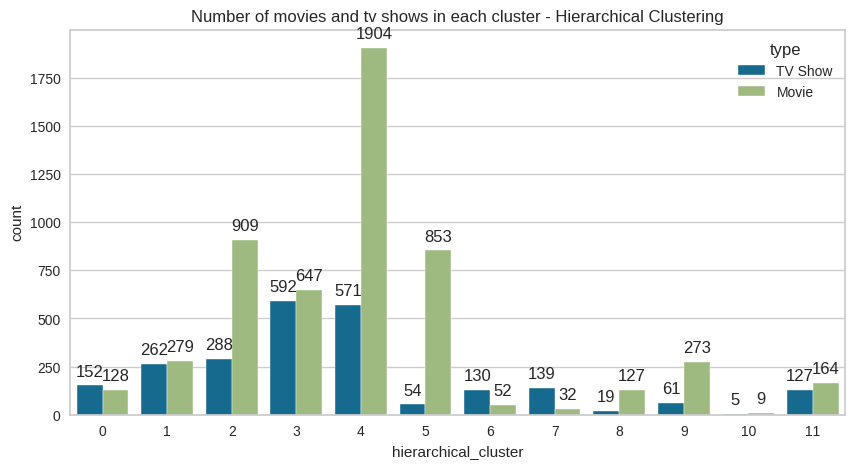

In [168]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [169]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

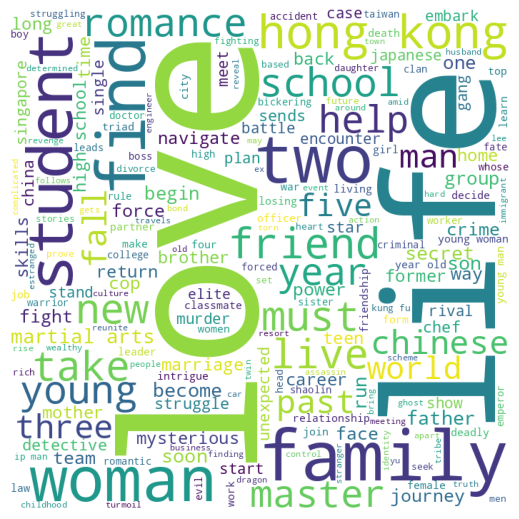

In [170]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

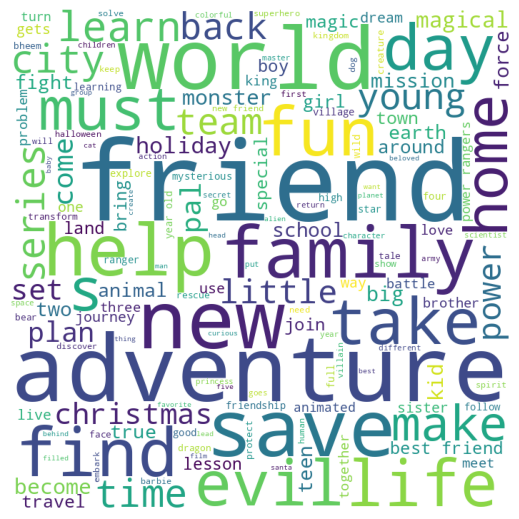

In [171]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

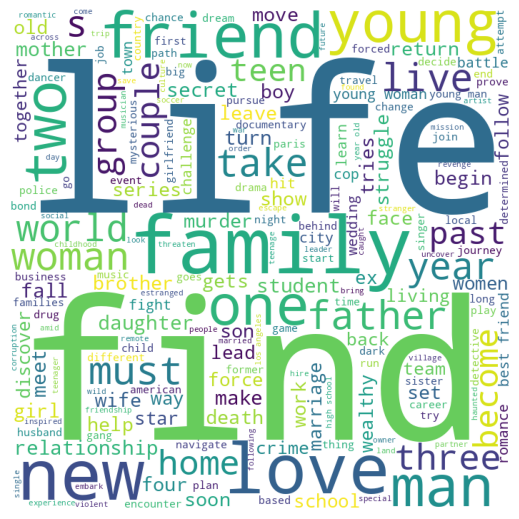

In [172]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

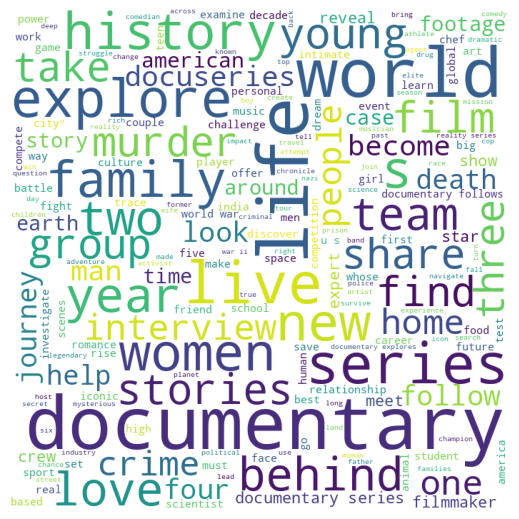

In [174]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

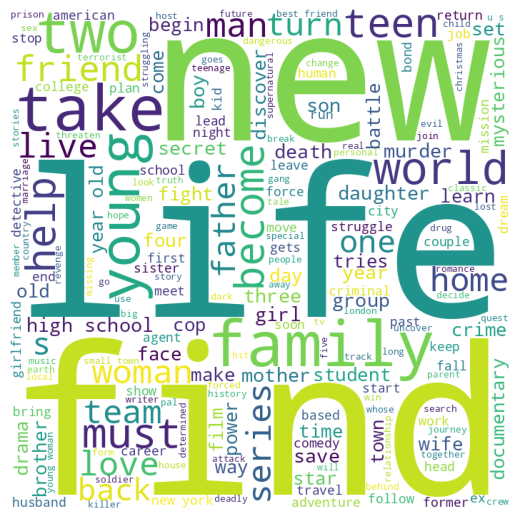

In [175]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

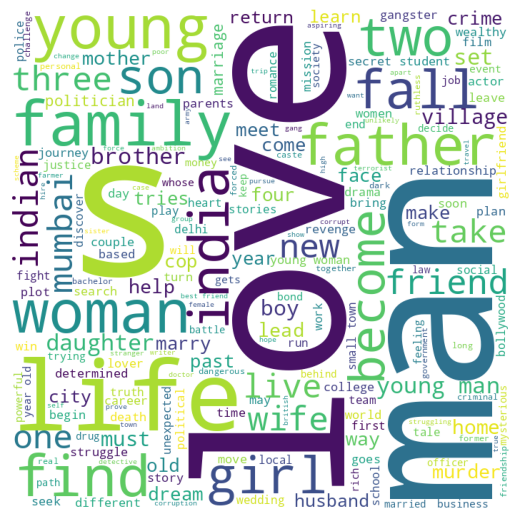

In [176]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

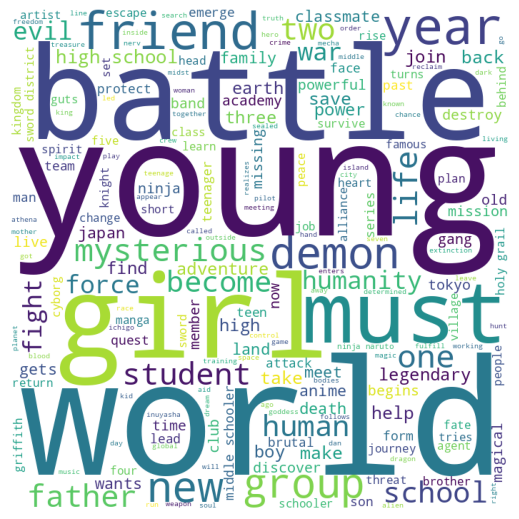

In [177]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

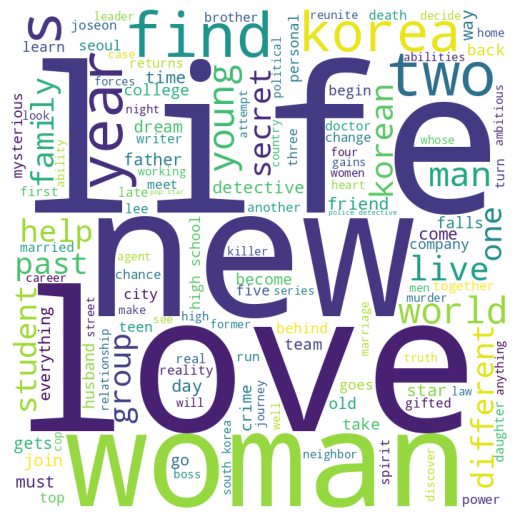

In [178]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

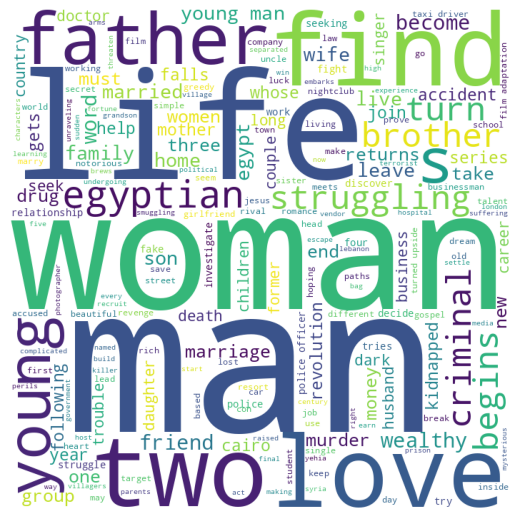

In [179]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

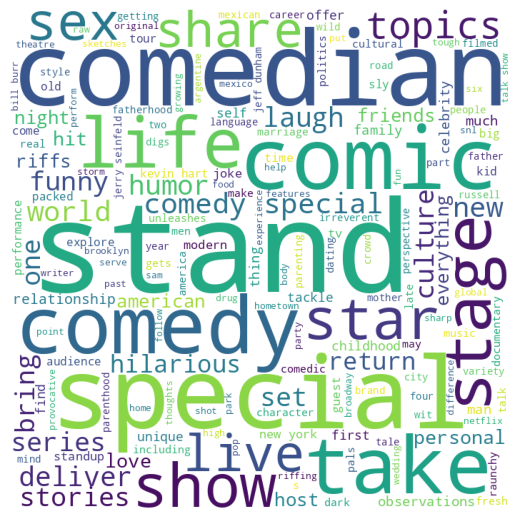

In [180]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

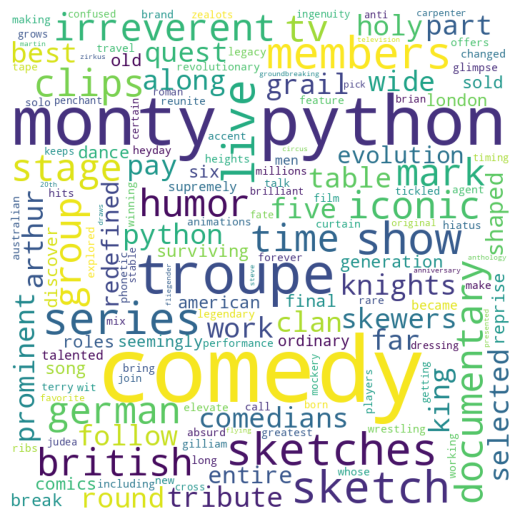

In [181]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

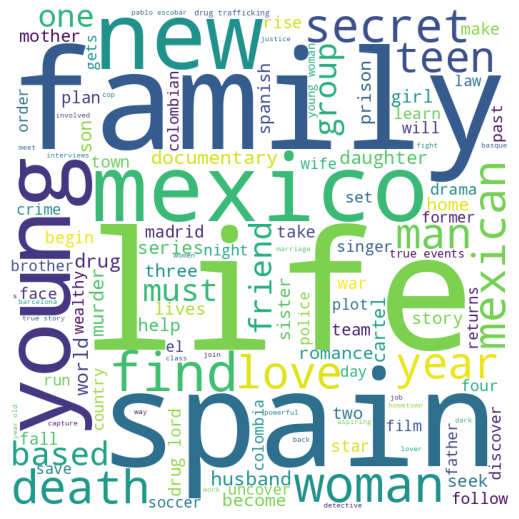

In [182]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [184]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [185]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [186]:
# ML Model - 3 Implementation

# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(x_pca)
  preds = km.predict(x_pca)
  centers = km.cluster_centers_
  score = silhouette_score(x_pca, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0028
For n_clusters = 3, silhouette score is 0.0050
For n_clusters = 4, silhouette score is 0.0046
For n_clusters = 5, silhouette score is -0.0005
For n_clusters = 6, silhouette score is -0.0003
For n_clusters = 7, silhouette score is 0.0009
For n_clusters = 8, silhouette score is 0.0023
For n_clusters = 9, silhouette score is 0.0032
For n_clusters = 10, silhouette score is 0.0037
For n_clusters = 11, silhouette score is 0.0043
For n_clusters = 12, silhouette score is 0.0047
For n_clusters = 13, silhouette score is 0.0059
For n_clusters = 14, silhouette score is 0.0058


For n_clusters = 2, silhouette score is 0.002826413700242122


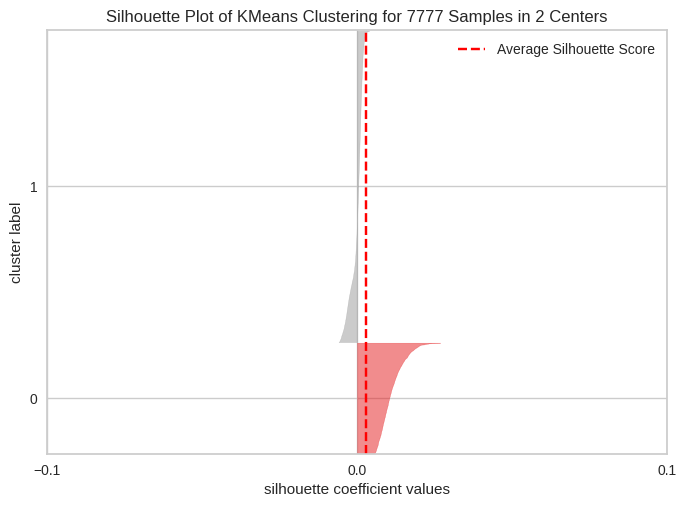

For n_clusters = 3, silhouette score is 0.00499578655803255


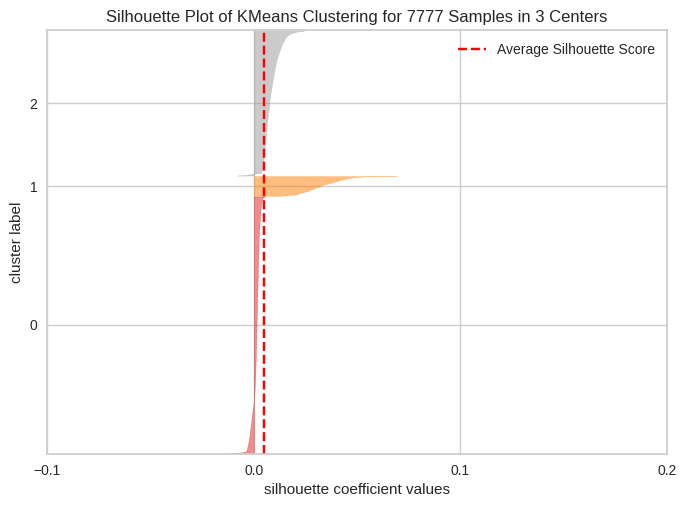

For n_clusters = 4, silhouette score is 0.004626101002012658


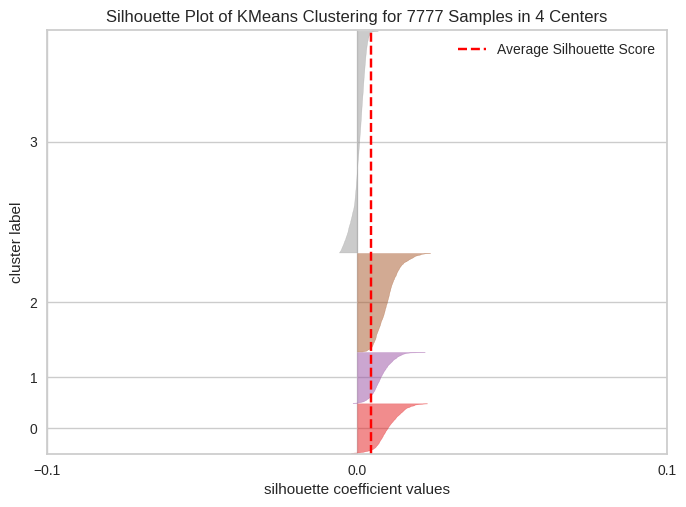

For n_clusters = 5, silhouette score is -0.00045206579371284575


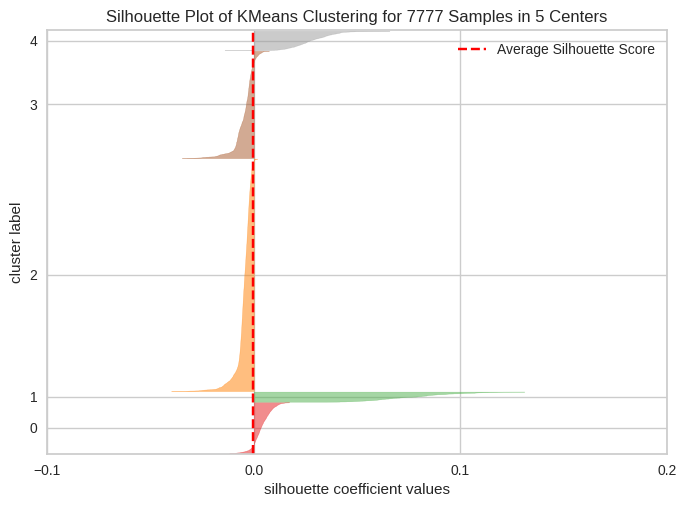

For n_clusters = 6, silhouette score is -0.0002853677805250101


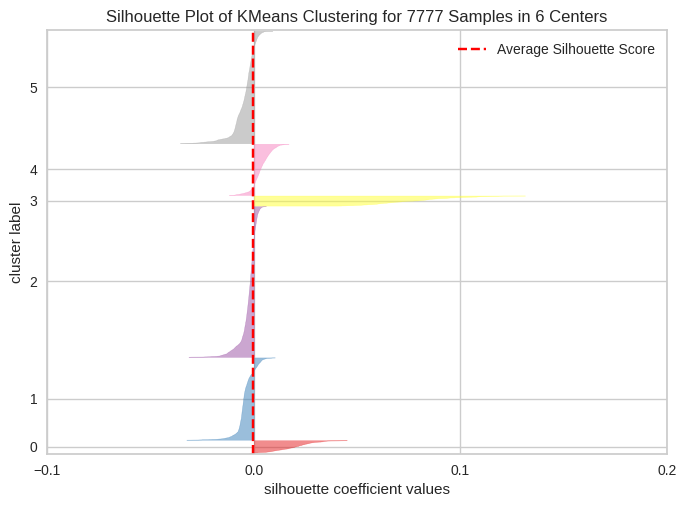

For n_clusters = 7, silhouette score is 0.0009406280046058276


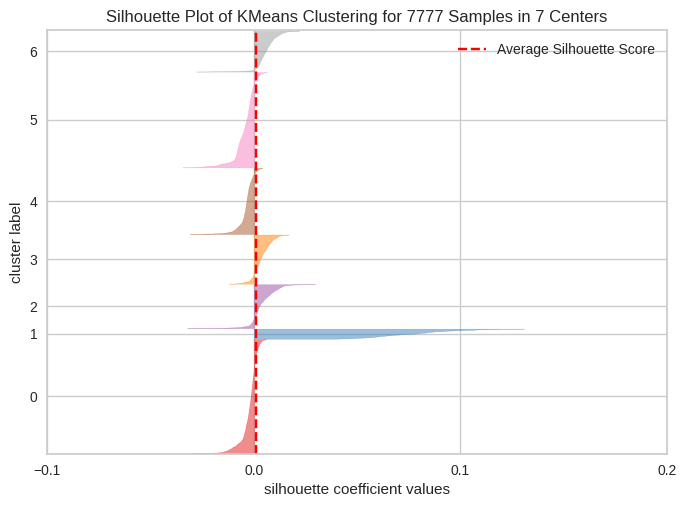

For n_clusters = 8, silhouette score is 0.002311700889972449


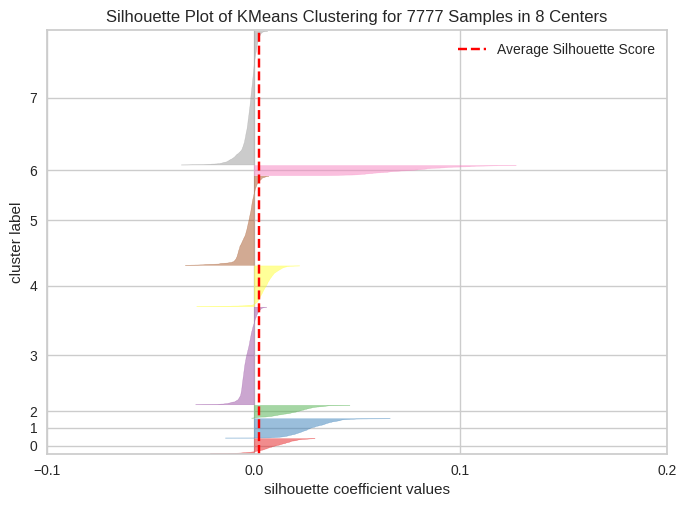

For n_clusters = 9, silhouette score is 0.0032164949917583745


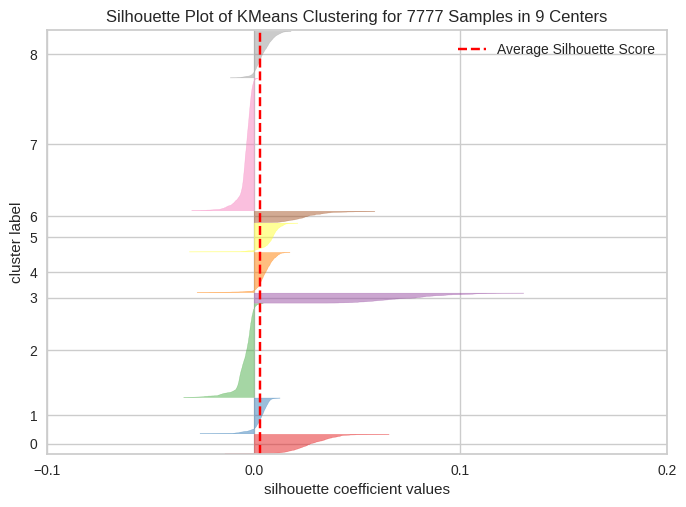

For n_clusters = 10, silhouette score is 0.003688404802229099


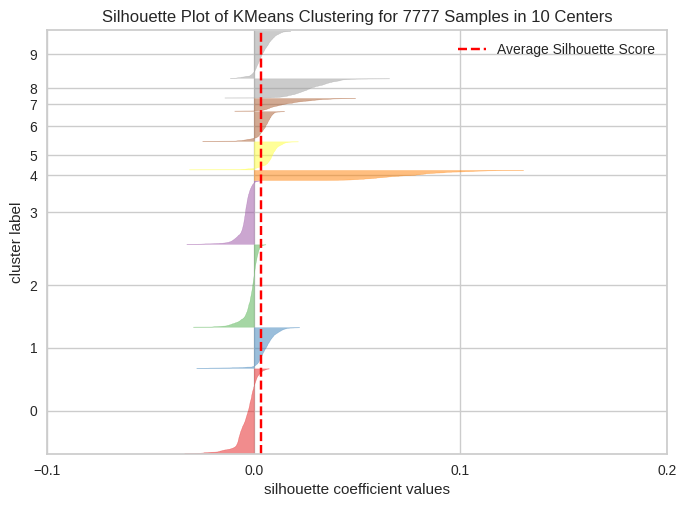

For n_clusters = 11, silhouette score is 0.004291748816068659


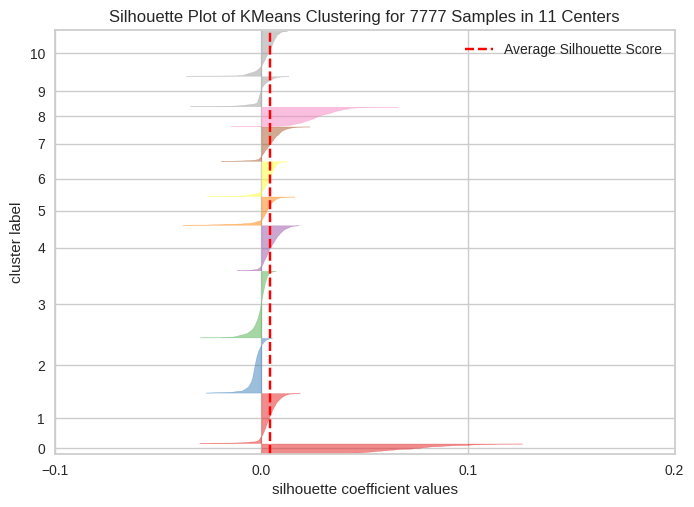

For n_clusters = 12, silhouette score is 0.004670843410211898


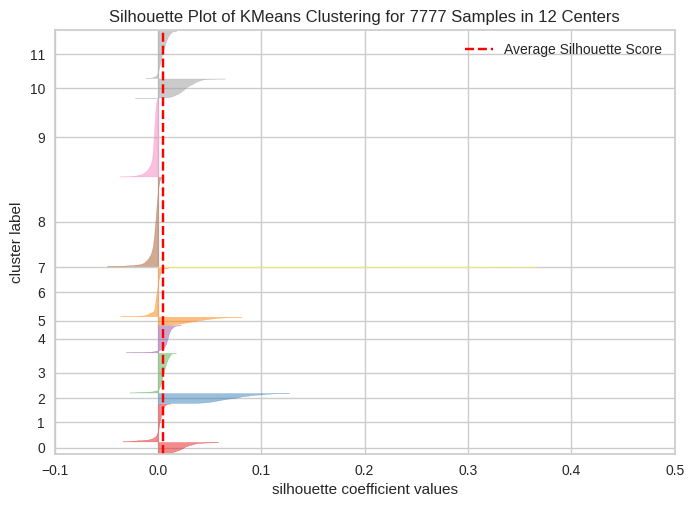

For n_clusters = 13, silhouette score is 0.005863754597563913


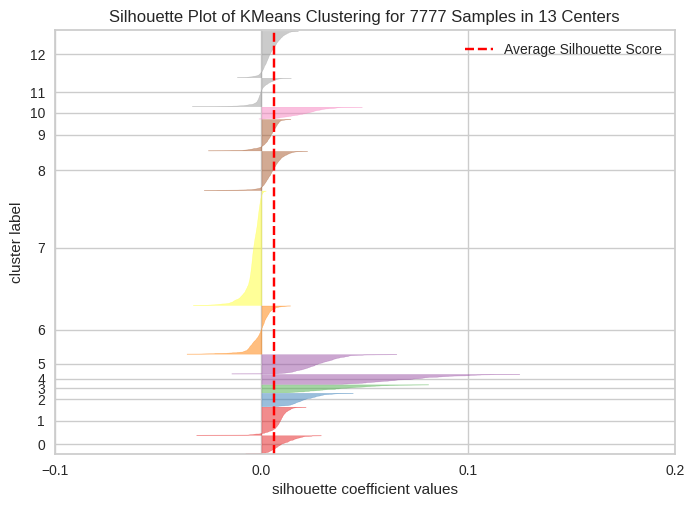

For n_clusters = 14, silhouette score is 0.005849649369799326


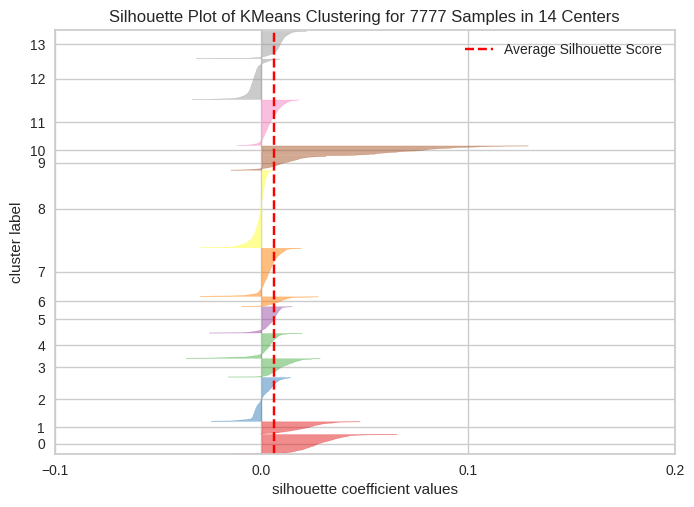

In [189]:
# Generate Silhouette Plots for Each Clusters

from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
    km.fit(x_pca)
    preds = km.predict(x_pca)
    centers = km.cluster_centers_

    # Set parameters and labels
    score = silhouette_score(x_pca, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(x_pca) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [353]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [354]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

In [ ]:
# Defining a new dataframe for building a recommender system
recommender_df = df.copy()

# Resetting index
recommender_df.reset_index(inplace=True)

# Dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [ ]:
# Calculate cosine similarity on transformed array independent features created from tags(cluster) column
similarity = cosine_similarity(X)

In [ ]:
# Define a function which recommends top 10 shows on the basis of cosine similarity score
def recommend(content):
  try:
    '''
    This function recommends top 10 shows similar to the input show based on their similarity scores.
    '''

    # Find the index position of the input content
    index = recommender_df[recommender_df['title'] == content].index[0]

    # Sorting on the basis of similarity score, in order to find out distances from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # Display the input movie/tv show name
    print('--'*30)
    print(f"Since you liked '{content}', you may also like:")
    print('--'*30)

    # List the top ten recommended movies/tv shows
    for i in distances[1:11]:
      print(data.iloc[i[0]].title)
  except:
     print(f"Didn't find any matches for '{content}'. Browse other popular TV shows and movies.")

In [ ]:
# Testing Recommender System on a Indian Movie
recommend('Zindagi Na Milegi Dobara')

In [ ]:
# Testing Recommender System on a International Movie
recommend('Avengers: Infinity War')

In [ ]:
# Testing Recommender System on a Korean TV Show
recommend('What in the World Happened?')

In [ ]:
# Testing Recommender System on a Content, Which is Not Listed in Netflix Dataset
recommend('Avenger')

## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [355]:
# Save the File

import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean,open('kmeans_model.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [356]:
# Load the File and predict unseen data.

# Unserialize process (rb=read byte)
pickled_model= pickle.load(open('kmeans_model.pkl','rb'))

# Predicting the unseen data
pickled_model.predict(X)

In [ ]:
y_kmean

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [357]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

In [358]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline